In [2]:
pip install pandas matplotlib scikit-learn tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Extracted Data:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigr  AegFeunction  Outcome  
0           0.627            50        1  
1           0.351            31        0  
2           0.672            32        1  
3           0.167            21        0  
4           2.288            33        1  


/home/tanmay/Desktop/coding/Machine_Learning/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tanmay/Desktop/coding/Machine_Learning/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tanmay/Desktop/coding/Machine_Learning/venv/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/h

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



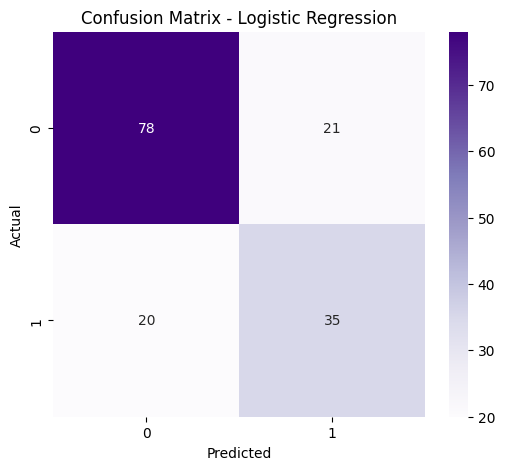

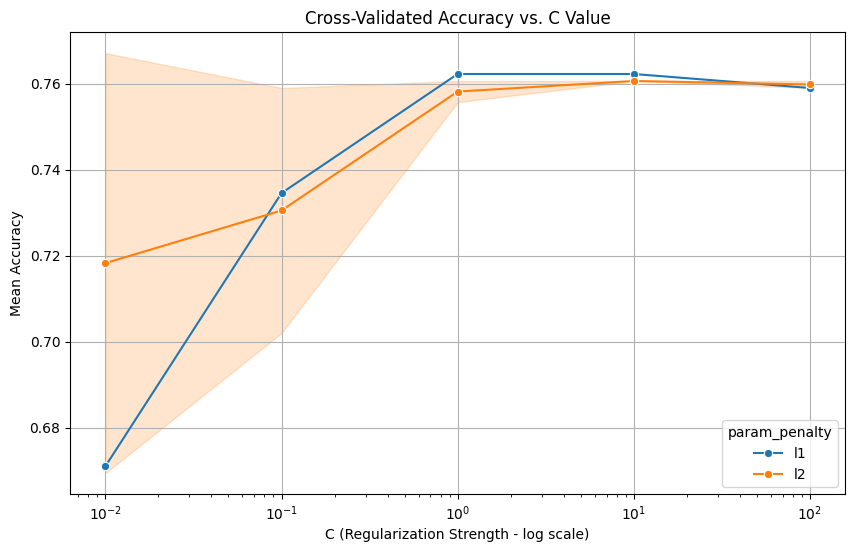

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tabula

# Step 1: Extract table from PDF
file_path = 'document.pdf'
dfs = tabula.read_pdf(file_path, pages='all', multiple_tables=False)
df = dfs[0]
print("Extracted Data:\n", df.head())

# Step 2: Feature and target separation (adjust column names if necessary)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
df = df.dropna()
X = X.fillna(0)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Logistic Regression with GridSearchCV
logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # regularization strength
    'solver': ['liblinear', 'lbfgs'],   # optimization algorithms
    'penalty': ['l1', 'l2']             # regularization types
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=kf, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Step 5: Evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Visualize Grid Search Scores
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='param_C', y='mean_test_score', hue='param_penalty', marker='o')
plt.title('Cross-Validated Accuracy vs. C Value')
plt.xscale('log')
plt.xlabel('C (Regularization Strength - log scale)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()
